<a href="https://colab.research.google.com/github/adithya1010/100-Days-of-Code/blob/main/Mini-Project-1/MiniProject_COVID2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mini Project - COVID data

Project done with inputs from DeepSeek R1 and V3, Gemini 1.5 Flash

**Link to Chat:** https://getmerlin.in/share/chat/xSSktOG18bm


**References:**

1. https://medium.com/@malli.learnings/exploring-machine-learning-models-a-comprehensive-comparison-of-logistic-regression-decision-38cc12287055
2. https://www.ijraset.com/research-paper/comparative-analysis-of-machine-learning-algorithms
3. https://www.sciencedirect.com/science/article/pii/S1877050922021159
4. https://github.com/ekombu/Comparison-of-classification-Algorithms-using-Iris-dataset
5. https://github.com/alicevillar/titanic-kaggle
6. https://medium.com/@balaswitha.reddy/battle-of-the-algorithms-comparing-decision-trees-svm-random-forests-and-logistic-regression-1bf3809c8df3
7. https://www.researchgate.net/publication/383112660_Survival_Prediction_and_Comparison_of_the_Titanic_based_on_Machine_Learning_Classifiers
8. https://github.com/adithya1010/Naan-Mudhalvan-Labs/tree/main/Task-3
9. https://colab.research.google.com/drive/1vizliO1MueA5rXjzpt8i08bb_VehL-ox?usp=sharing
10. https://colab.research.google.com/drive/1OiiWxznu_KzLoqjb3alUJauSSChrJQ5S?usp=sharing

The PPT prepared for this project can be found here:
https://gamma.app/docs/Mini-Project-COVID-data-analysis-bmnj4yqhkwqrtak

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.pipeline import make_pipeline


The 'low_memory=False' parameter is used to improve performance when reading large CSV files with mixed data types by allowing pandas to convert the data to a more memory-efficient format.

In [37]:
df = pd.read_csv('ASPR_Treatments_Locator_20250124.csv', low_memory=False)


In [38]:
# Drop irrelevant columns
columns_to_drop = [
    'Provider Name', 'Address 1', 'Address 2', 'City', 'State', 'Zip',
    'Public Phone', 'Geopoint', 'Last Report Date', 'Appointment URL',
    'Grantee Code', 'Is Flu'
]

In [39]:
df = df.drop(columns=columns_to_drop)


In [40]:
# Convert boolean columns to 0/1
boolean_columns = [
    'Is PAP Site', 'Home Delivery', 'Is ICATT Site', 'Has USG Product',
    'Has Commercial Product', 'Has Paxlovid', 'Has Commercial Paxlovid',
    'Has USG Paxlovid', 'Has Lagevrio', 'Has Commercial Lagevrio',
    'Has USG Lagevrio', 'Has Veklury', 'Has Oseltamivir Generic',
    'Has Oseltamivir Suspension', 'Has Oseltamivir Tamiflu', 'Has Baloxavir',
    'Has Zanamivir', 'Has Peramivir', 'Prescribing Services Available'
]

for col in boolean_columns:
    # Replace 'true', 'false', and empty strings with 1, 0, and 0 respectively
    df[col] = df[col].replace({'true': 1, 'false': 0, '': 0})
    # Convert the column to numeric, coercing errors to NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')
    # Fill NaN values with 0 and then convert to integers
    df[col] = df[col].fillna(0).astype(int)

In [41]:
# Define features and target
X = df.drop(columns=['Is COVID-19'])
y = df['Is COVID-19'].astype(int)

In [42]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {}: This creates an empty dictionary named models. Dictionaries are used to store key-value pairs. In this case, the keys will be the names of the models (e.g., 'Logistic Regression'), and the values will be the actual model objects.

text

'Logistic Regression': make_pipeline(StandardScaler(), LogisticRegression())
:

'Logistic Regression' is the key, a string representing the name of the model.
text

make_pipeline(StandardScaler(), LogisticRegression())
creates a pipeline. A pipeline is a way to chain together multiple data transformations and a final estimator (the model). This is good practice for several reasons:
Simplifies Code: It encapsulates all the steps (scaling and model fitting) into one object.
Prevents Data Leakage: It ensures that the scaling is done within each cross-validation fold, preventing information from the test set from leaking into the training process.
StandardScaler(): This is a preprocessing step that standardizes the data by removing the mean and scaling to unit variance. This is often important for models like Logistic Regression that are sensitive to feature scaling.
LogisticRegression(): This is the Logistic Regression model itself.
'SVM': make_pipeline(StandardScaler(), SVC()): Similar to Logistic Regression, this creates a pipeline for a Support Vector Machine (SVM) model:

'SVM' is the key.
make_pipeline(StandardScaler(), SVC()) creates a pipeline with:
StandardScaler(): Scales the data (important for SVM).
SVC(): This is the Support Vector Classifier model. It uses the default parameters.
'Decision Tree': DecisionTreeClassifier():

'Decision Tree' is the key.
DecisionTreeClassifier(): This creates a Decision Tree model. No scaling is included in the pipeline.
'Random Forest': RandomForestClassifier():

'Random Forest' is the key.
RandomForestClassifier(): This creates a Random Forest model. No scaling is included in the pipeline.
In summary, this code initializes a dictionary containing four different machine learning models, with pipelines for Logistic Regression and SVM that include data scaling. This dictionary will likely be used later to train, evaluate, or compare these models on a dataset.

In [43]:
# Initialize models
models = {
    'Linear Regression': make_pipeline(StandardScaler(), LinearRegression()),
    'Logistic Regression': make_pipeline(StandardScaler(), LogisticRegression()),
    'SVM': make_pipeline(StandardScaler(), SVC()),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

results = []: Initializes an empty list called results. This list will store the performance metrics for each model.

for name, model in models.items():: This loop iterates through the models dictionary. In each iteration:

name will be the name of the model (e.g., 'Logistic Regression').
model will be the actual model object (e.g., the Logistic Regression pipeline).
model.fit(X_train, y_train): This line trains the model using the training data (X_train are the features, y_train are the target variables). The fit method learns the relationship between the features and the target.

y_pred = model.predict(X_test): This line uses the trained model to make predictions on the test data (X_test). y_pred will be an array of predicted target values.

accuracy = accuracy_score(y_test, y_pred): Calculates the accuracy of the model. Accuracy is the proportion of correctly classified instances. It compares the predicted values (y_pred) to the true values (y_test).

precision = precision_score(y_test, y_pred): Calculates the precision of the model. Precision is the proportion of true positive predictions out of all positive predictions. It measures how well the model avoids false positives.

recall = recall_score(y_test, y_pred): Calculates the recall of the model. Recall is the proportion of true positive predictions out of all actual positive instances. It measures how well the model avoids false negatives.

results.append(...): Appends a dictionary containing the model's name and its performance metrics (accuracy, precision, recall) to the results list. The round(..., 3) function rounds the metrics to three decimal places for better readability.

results_df = pd.DataFrame(results): Creates a Pandas DataFrame from the results list. This is a convenient way to organize and display the results in a table.

print(results_df): Prints the DataFrame to the console, showing the performance metrics for each model.

In [44]:
# Evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Apply classification metrics only if the model is not Linear Regression
    if name != 'Linear Regression':
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        results.append({
            'Model': name,
            'Accuracy': round(accuracy, 3),
            'Precision': round(precision, 3),
            'Recall': round(recall, 3)
        })
    # For Linear Regression, you might want to use regression metrics like R-squared, MSE, etc.
    else:
        # Example using R-squared:
        from sklearn.metrics import r2_score
        r2 = r2_score(y_test, y_pred)
        results.append({
            'Model': name,
            'R-squared': round(r2, 3) # Replace with appropriate regression metrics
        })

# Display results
results_df = pd.DataFrame(results)
print(results_df)

                 Model  R-squared  Accuracy  Precision  Recall
0    Linear Regression      0.339       NaN        NaN     NaN
1  Logistic Regression        NaN       1.0        1.0     1.0
2                  SVM        NaN       1.0        1.0     1.0
3        Decision Tree        NaN       1.0        1.0     1.0
4        Random Forest        NaN       1.0        1.0     1.0


import matplotlib.pyplot as plt: Imports the matplotlib.pyplot module, which is used for creating plots.
import seaborn as sns: Imports the seaborn module, which provides a higher-level interface for creating more visually appealing plots on top of Matplotlib.
results_df = pd.DataFrame(results): Converts the results list of dictionaries into a Pandas DataFrame. This is crucial for easily accessing and plotting the data.
plt.figure(figsize=(10, 6)): Creates a new figure with a specified size (width=10 inches, height=6 inches). This controls the overall size of the plot.
sns.set(style="whitegrid"): Sets the Seaborn style to "whitegrid," which adds a white background and gridlines to the plot, making it easier to read.
x = range(len(results_df)): Creates a sequence of numbers from 0 to the number of models - 1. This will be used for the x-axis positions of the bars.
width = 0.2: Defines the width of each bar in the bar chart. Adjust this value to change the spacing between bars.
text

plt.bar(x, results_df['Accuracy'], width, label='Accuracy', color='blue')
: Creates a bar chart for the accuracy scores.
x: The x-axis positions of the bars.
results_df['Accuracy']: The height of the bars (the accuracy scores).
width: The width of the bars.
label='Accuracy': The label for the legend.
color='blue': The color of the bars.
text

plt.bar([i + width for i in x], results_df['Precision'], width, label='Precision', color='orange')
: Creates a bar chart for the precision scores, shifted slightly to the right so that the precision bars are next to the accuracy bars.
[i + width for i in x]: Shifts the x-axis positions by width to place the precision bars next to the accuracy bars.
text

plt.bar([i + 2 * width for i in x], results_df['Recall'], width, label='Recall', color='green')
: Creates a bar chart for the recall scores, shifted even further to the right.
plt.xlabel('Models'): Sets the label for the x-axis.
plt.ylabel('Score'): Sets the label for the y-axis.
text

plt.title('Comparison of Model Performance (Accuracy, Precision, Recall)')
: Sets the title of the plot.
text

plt.xticks([i + width for i in x], results_df['Model'])
: Sets the x-axis tick labels to the names of the models. The [i + width for i in x] ensures the labels are centered under the grouped bars.
plt.legend(loc='upper right'): Displays the legend in the upper right corner of the plot.
plt.tight_layout(): Adjusts the plot layout to prevent labels from overlapping.
plt.show(): Displays the plot.

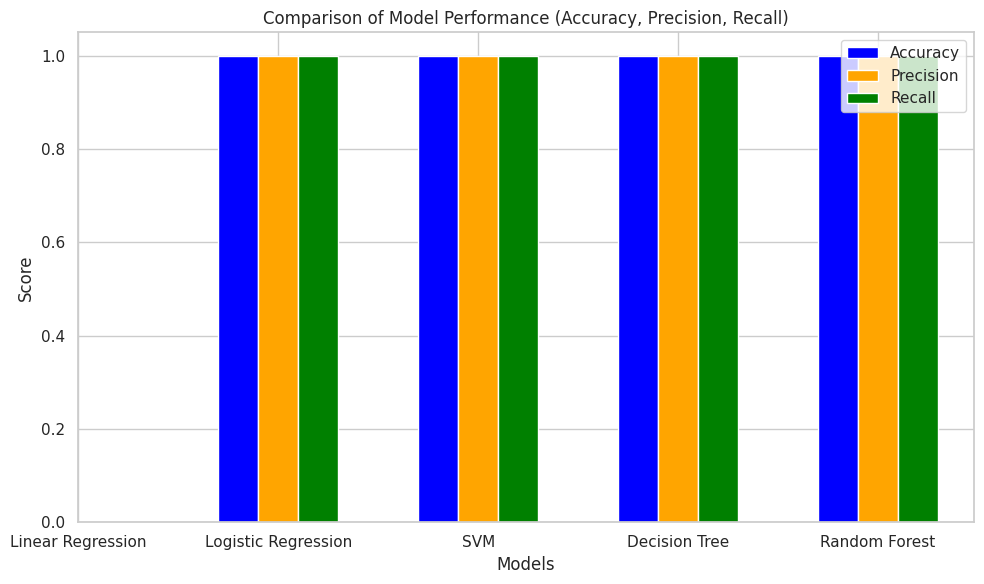

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert results to a DataFrame for easier plotting
results_df = pd.DataFrame(results)

# Set up the figure and axis
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot accuracy, precision, and recall for each model
x = range(len(results_df))
width = 0.2

plt.bar(x, results_df['Accuracy'], width, label='Accuracy', color='blue')
plt.bar([i + width for i in x], results_df['Precision'], width, label='Precision', color='orange')
plt.bar([i + 2 * width for i in x], results_df['Recall'], width, label='Recall', color='green')

# Add labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Comparison of Model Performance (Accuracy, Precision, Recall)')
plt.xticks([i + width for i in x], results_df['Model'])
plt.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()